# Run structure on all runs to date 01/20

## Read in all excel files, write one big file

In [1]:
import pandas as pd
import numpy as np

### 52

In [96]:
files52 = ["021920/GenotypeArea_Katherine_DB_CHIP707_DB52_02192020_CHIP707_DB52_02192020_1_AC.xls",
          "032720/GenotypeArea_Katherine_DB_CHIP_723_52DB_03272020_CHIP723_03272020_1_ACme.xls",
          "041720/GenotypeArea_Katherine_DB_CHIP734_DB52_041720_CHIP734_DB52_04172020_1_AC.xls",
          "042420/GenotypeArea_Katherine_DB_CHIP744_DB52_04242020_CHIP744_DB52_04242020_1_AC.xls",
          "043020/GenotypeArea_Katherine_DB_CHIP749_DB52_043020_CHIP749_DB52_043020_1_ACme.xls",
          "050720/GenotypeArea_Katherine_DB_CHIP757_DB52_050720_CHIP757_DB52_050720_1_ACme.xls",
          "051420/GenotypeArea_Katherine_DB_CHIP761_DB52_051420_CHIP761_DB52_0514_1_ACme.xls",
          "052920/GenotypeArea_Katherine_DB_CHIP770_CHIP770_DB52_052920_1_ACme.xls",
          "082520/comb_GenotypeArea_Katherine_DB_CHIP796_CHIP818_DB52_082520_CHIP796_DB52_082520_2_AC.xls",
          "100520/comb_GenotypeArea_Katherine_DB_CHIP819_CHIP814_DB52_101220_814redo_CHIP819_DB52_101220_814redo_1_AC.xls",
          "120720/GenotypeArea_Katherine_DB_CHIP834_DB52_12072020_CHIP834_DB52_12072020_1_ACme.xls"]

In [97]:
all_genoList = []

for file in files52:
    date= [file.split("/")[0]] * 96
    inxl = pd.ExcelFile(file)
    geno = inxl.parse('Genotypes')
    geno['Date'] = date
    all_genoList.append(geno)


In [98]:
all_geno = pd.concat(all_genoList)

In [99]:
all_geno.shape

(1056, 55)

In [100]:
def medals(string):
    '''takes a file, and gathers up the country codes and their medal counts
    storing them into a dictionary'''

    #creates an empty dictionary
    medalDict = {}
    #creates an empty tuple
    medalCount = ()
    #These following two lines remove the column headings
    with open(string) as fin:
        
        for eachline in fin:
            date, m = eachline.strip().split(',',1)
            data = m.split(',')
            data = set(zip(data[::2],data[1::2])) 
            medalDict[date] = data

    return medalDict


In [101]:
goodSamps = medals("goodSampsDict0219_1207.csv")

In [102]:
pass_52 = []
bad_52 = []
idx = pd.MultiIndex.from_frame(all_geno[['SAMPLE_NAME', 'WELL','Date']])
for date in goodSamps.keys():
    good = [tuple(list(tup)+[date]) for tup in goodSamps[date]]
    for b in bad:
        if b not in idx:
            print(b)
    pass_52.append(all_geno.loc[idx.isin(good)])


In [103]:
good_geno = pd.concat(pass_52)

In [104]:
good_geno.shape

(990, 55)

In [105]:
df = all_geno.merge(good_geno, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']

df

,SAMPLE_NAME,WELL,X104650_2998,X104795_7287,X107554_774,X112084_4248,X117099_13373,X120320_1376,X121338_5301,X126230_13777,...,X232694_38736,X242754_25195,X246726_9592,X247730_24337,X248436_64413,X2819_3199,X8113_1011,X99650_7157,Date,_merge
14,CANOT11837,H06,T,NaN,NaN,G,C,AG,NaN,NaN,...,GT,G,G,NaN,T,G,NaN,A,021920,left_only
50,LA1136,C12,TC,GA,NaN,G,C,AG,NaN,C,...,NaN,GA,G,NaN,NaN,NaN,TA,A,021920,left_only
52,LAMAR2,A10,TC,GA,NaN,G,C,AG,NaN,NaN,...,GT,GA,G,NaN,NaN,NaN,TA,A,021920,left_only
53,LAMAR2,H09,TC,GA,CT,G,C,AG,NaN,NaN,...,GT,GA,G,NaN,NaN,AG,TA,A,021920,left_only
68,Otter19,A02,NaN,NaN,NaN,NaN,C,G,NaN,C,...,NaN,GA,G,NaN,NaN,NaN,NaN,A,021920,left_only
86,SL04,A07,C,GA,T,NaN,C,G,A,NaN,...,GT,G,G,C,T,G,T,A,021920,left_only
119,GU46,E06,NaN,NaN,NaN,NaN,C,AG,NaN,NaN,...,NaN,GA,G,NaN,T,G,NaN,NaN,032720,left_only
120,GU55,E07,NaN,NaN,NaN,NaN,NaN,AG,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,032720,left_only
121,GU56,E09,TC,G,CT,C,NaN,AG,G,NaN,...,G,GA,A,CT,T,AG,TA,A,032720,left_only
124,GU61,F01,TC,A,C,GC,NaN,AG,A,NaN,...,GT,G,G,CT,TC,NaN,TA,A,032720,left_only


In [9]:
# don't run
df = filt_geno
coverage_row= df.iloc[:,2:-1].count(axis=1)/52
filt_geno['Coverage'] = coverage_row
#df_coverage=pd.DataFrame(data=coverage_row,columns=['Coverage'])
#df52_39_sfilt =pd.concat([df,df_coverage],axis=1)
#df52_39_sfilt.head()
filt_geno.head()

/home/ksilliman/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,SAMPLE_NAME,WELL,X104650_2998,X104795_7287,X107554_774,X112084_4248,X117099_13373,X120320_1376,X121338_5301,X126230_13777,...,X232694_38736,X242754_25195,X246726_9592,X247730_24337,X248436_64413,X2819_3199,X8113_1011,X99650_7157,Date,Coverage
0,ALL02,B12,T,G,CT,C,C,A,A,NaN,...,GT,GA,GA,T,T,AG,A,A,021920,0.923077
1,ALL03,G12,T,A,T,C,CT,A,G,NaN,...,GT,G,G,CT,T,AG,T,A,021920,0.942308
2,ALL04,F08,C,GA,C,C,CT,G,G,NaN,...,G,GA,A,C,T,G,A,GA,021920,0.923077
3,ALL05,H08,T,GA,CT,C,T,AG,AG,NaN,...,GT,G,GA,C,T,G,A,A,021920,0.923077
4,ALL06,G11,TC,GA,CT,C,T,AG,AG,NaN,...,G,GA,A,T,T,AG,T,A,021920,0.903846


In [106]:
good_geno = good_geno.sort_values(by=['SAMPLE_NAME'])

In [107]:
with open("Dates_0219_1207_filt", "w") as myfile:
    myfile.writelines("%s\n" % s for s in good_geno.loc[:,'Date'])

In [108]:
good_geno.drop(['Date'],axis=1,inplace=True)
good_geno.shape

(990, 54)

In [109]:
good_geno.head()

,SAMPLE_NAME,WELL,X104650_2998,X104795_7287,X107554_774,X112084_4248,X117099_13373,X120320_1376,X121338_5301,X126230_13777,...,X227403_586,X232070_4307,X232694_38736,X242754_25195,X246726_9592,X247730_24337,X248436_64413,X2819_3199,X8113_1011,X99650_7157
0,AGF19_008,C02,NaN,GA,NaN,C,NaN,AG,A,NaN,...,G,C,G,G,G,C,T,G,T,G
1,AGF19_056,C04,TC,GA,C,C,CT,G,A,NaN,...,G,C,GT,G,G,C,T,G,T,G
2,AGF19_059,C05,TC,A,T,C,C,G,A,NaN,...,G,C,GT,G,A,C,T,G,T,G
3,AGF19_071,C06,TC,GA,T,C,C,AG,A,NaN,...,G,C,G,G,G,C,T,G,T,G
4,AGF19_088,C03,TC,A,CT,C,NaN,AG,A,NaN,...,G,NaN,GT,G,G,C,T,G,T,G


In [110]:
# save to Excel sheet
good_geno.to_excel('Genotypes_DB52_0219_1207_filt.xlsx',sheet_name='Genotypes',index=False)

### 39

In [111]:
files39 = ["021920/GenotypeArea_Katherine_DB_CHIP708_DB39_02192020_CHIP708_DB39_02192020_1_AC.xls",
          "032720/GenotypeArea_Katherine_DB_CHIP724_DB39_03272020_CHIP724_03272020_1_ACme.xls",
          "041720/GenotypeArea_Katherine_DB_CHIP735_DB39_041720_CHIP735_DB39_04172020_1_AC.xls",
          "042420/GenotypeArea_Katherine_DB_CHIP745_DB39_04242020_CHIP745_DB39_04242020_1_AC.xls",
          "043020/GenotypeArea_Katherine_DB_CHIP750_DB39_043020_CHIP750_DB39_043020_1_ACme.xls",
          "050720/GenotypeArea_Katherine_DB_CHIP758_DB39_050720_CHIP758_DB39_050720_1_ACme.xls",
          "051420/GenotypeArea_Katherine_DB_CHIP762_DB39_051420_CHIP762_DB39_051420_1_ACme.xls",
          "052920/GenotypeArea_Katherine_DB_CHIP771_DB39_052920_CHIP771_DB39_052920_1_ACme.xls",
          "082520/GenotypeArea_Katherine_DB_CHIP797_DB39_082520_CHIP797_DB39_082520_2_AC.xls",
          "100520/comb_GenotypeArea_Katherine_DB_CHIP820_CHIP815_DB39_101220_CHIP820_DB39_101220_815redo_1_ACme.xls",
          "120720/GenotypeArea_Katherine_DB_CHIP835_DB39_12072020_CHIP835_D392_12072020_1_ACme.xls"]

In [112]:
all_genoList39 = []

def stripX(x):
    return x[1:]


for file in files39:
    date= [file.split("/")[0]] * 96
    inxl = pd.ExcelFile(file)
    geno = inxl.parse('Genotypes')
    if "X" in geno.loc[0,'SAMPLE_NAME']:
        geno = inxl.parse('Genotypes',converters={'SAMPLE_NAME':stripX})
    geno['Date'] = date
    all_genoList39.append(geno)


In [113]:
all_geno39 = pd.concat(all_genoList39)

In [114]:
all_geno39.shape

(1056, 42)

In [115]:
pass_39 = []
idx = pd.MultiIndex.from_frame(all_geno39[['SAMPLE_NAME', 'WELL','Date']])
for date in goodSamps.keys():
    good = [tuple(list(tup)+[date]) for tup in goodSamps[date]]
    for b in bad:
        if b not in idx:
            print(b)
    pass_39.append(all_geno39.loc[idx.isin(good)])


In [116]:
good_geno39 = pd.concat(pass_39)

In [117]:
good_geno39.shape

(990, 42)

In [118]:
set(good_geno.SAMPLE_NAME).symmetric_difference(good_geno39.SAMPLE_NAME)

set()

In [119]:
good_geno39 = good_geno39.sort_values(by=['SAMPLE_NAME'])

In [120]:
good_geno39.drop(['Date'],axis=1,inplace=True)
good_geno39.shape

(990, 41)

In [121]:
good_geno.head()

,SAMPLE_NAME,WELL,X104650_2998,X104795_7287,X107554_774,X112084_4248,X117099_13373,X120320_1376,X121338_5301,X126230_13777,...,X227403_586,X232070_4307,X232694_38736,X242754_25195,X246726_9592,X247730_24337,X248436_64413,X2819_3199,X8113_1011,X99650_7157
0,AGF19_008,C02,NaN,GA,NaN,C,NaN,AG,A,NaN,...,G,C,G,G,G,C,T,G,T,G
1,AGF19_056,C04,TC,GA,C,C,CT,G,A,NaN,...,G,C,GT,G,G,C,T,G,T,G
2,AGF19_059,C05,TC,A,T,C,C,G,A,NaN,...,G,C,GT,G,A,C,T,G,T,G
3,AGF19_071,C06,TC,GA,T,C,C,AG,A,NaN,...,G,C,G,G,G,C,T,G,T,G
4,AGF19_088,C03,TC,A,CT,C,NaN,AG,A,NaN,...,G,NaN,GT,G,G,C,T,G,T,G


In [122]:
# save to Excel sheet
good_geno39.to_excel('Genotypes_DB39_0219_1207_filt.xlsx',sheet_name='Genotypes',index=False)

### Change manually repeat names and delete repeats with references

In [134]:
python ../MA2genepop.py Genotypes_DB52_0219_1207_filt_ed.xlsx \
../Panel_Design/refV4_0120.gen 0219_1207_refs_V4.gen -i2 Genotypes_DB39_0219_1207_filt_ed.xlsx \
$(cat V4badSNPs) 

In [2]:
library(strataG)
library(adegenet)
library(reshape2)
library(plyr)
library(dplyr)

Loading required package: ade4

   /// adegenet 2.1.2 is loaded ////////////

   > overview: '?adegenet'
   > tutorials/doc/questions: 'adegenetWeb()' 
   > bug reports/feature requests: adegenetIssues()



Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [135]:
ad <- read.genepop("0219_1207_refs_V4.gen")
ad


 Converting data from a Genepop .gen file to a genind object... 


File description:  MA 

...done.



/// GENIND OBJECT /////////

 // 1,052 individuals; 73 loci; 146 alleles; size: 721 Kb

 // Basic content
   @tab:  1052 x 146 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 2-2)
   @loc.fac: locus factor for the 146 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 2-2)
   @type:  codom
   @call: read.genepop(file = "0219_1207_refs_V4.gen")

 // Optional content
   @pop: population of each individual (group size range: 62-990)

In [10]:
dict = read.table("DB_popconvert_all.tsv",header = T,sep="\t",stringsAsFactors = F)

In [145]:
dict

Pop.ID,PopName,GPS,SpeciesNum
AG,Arizona,X,4
AL,Allatoona,X,4
AS,AmericanSportfish,X,4
BM,Bay Minette,X,2
BO,Boone_TN,X,4
BR,Blue Ridge,X,4
CA,BBCanot,X,2
DE,Delaware,X,1
DB,DOlive Bay,X,2
DM,Demopolis,X,4


In [146]:
sites = substr(indNames(ad),1,2)
species = sites
map = setNames( as.vector(dict$PopName),as.vector(dict$Pop.ID))
species[] <- map[unlist(sites)]
pop(ad) <- species
save(ad,file="0219_1207_refs_V4.genind")

In [147]:
sites = substr(indNames(ad),1,2)
species = sites
map = setNames( as.vector(dict$SpeciesNum),as.vector(dict$Pop.ID))
species[] <- map[unlist(sites)]
pop(ad) <- species

In [148]:
numRefs <- 62
pflagMap <- c(rep(1,numRefs),rep(0,length(indNames(ad))-numRefs))
names(pflagMap) <- indNames(ad)

In [149]:
gi.g <- genind2gtypes(ad)
gi.g


<<< gtypes created on 2021-01-25 20:04:00 >>>

Contents: 1052 samples, 73 loci, 4 strata
Other info: genind

Strata summary:
  stratum num.ind num.missing num.alleles
1       1     124   1.4794521    1.986301
2       2     268   2.0684932    2.000000
3       3      39   0.3013699    1.109589
4       4     621   5.4931507    2.000000


In [150]:
pflag = c(rep(0,length(indNames(ad))))
#map = setNames(as.vector(pflag),as.vector(names(pflag)))
pflag[] <- pflagMap[unlist(getIndNames(gi.g))]
pflag <- as.numeric(pflag)

In [152]:
tail(cbind(getIndNames(gi.g),getStrata(gi.g), pflag))

,,,pflag
WP62,WP62,4,0
WP64,WP64,4,0
WP70,WP70,4,0
WP74,WP74,4,0
WP75,WP75,4,0
WP77,WP77,4,0


In [153]:
sr <- structureRun(gi.g, label = "0219_1207_newRefs",k.range = c(3), num.k.rep = 3
                   ,burnin=20000,numreps=150000,noadmix=F, freqscorr=T,pop.prior = "usepopinfo",migrprior = 0.05,popflag=pflag,delete.files = FALSE)

In [154]:
save(sr,file="sr_0219_1207_newRefs")

In [1]:
load("sr_0219_1207_newRefs")

In [7]:
q.mat <- clumpp(sr, k = 3)
head(q.mat)

id,pct.miss,orig.pop,Group.1,Group.2,Group.3
AGF19008,4,4,0.8943,0.1017,0.0040
AGF19056,1,4,0.7693,0.1933,0.0373
AGF19059,1,4,0.8351,0.1579,0.0070
AGF19071,0,4,0.8397,0.1433,0.0170
AGF19088,5,4,0.8876,0.0984,0.0140
ALL02,0,4,0.1880,0.4050,0.4070


In [6]:
q.mat[which(grepl("Sip",q.mat$id)),]

,id,pct.miss,orig.pop,Group.1,Group.2,Group.3
892,Sips110,0,2,0.1267,0.7643,0.1090
895,Sips13,0,2,0.0180,0.9370,0.0450
896,Sips14,0,2,0.0480,0.9440,0.0080
897,Sipsey111,2,2,0.0360,0.8743,0.0897
898,Sipsey112,0,2,0.0550,0.7920,0.1530
899,Sipsey113,0,2,0.0560,0.9227,0.0213
900,Sipsey115,2,2,0.0791,0.8989,0.0220
901,Sipsey116,0,2,0.0180,0.9420,0.0400
902,Sipsey117,1,2,0.0090,0.9860,0.0050
903,Sipsey117rf,1,2,0.0000,1.0000,0.0000


In [8]:
q.mat.cp <- q.mat

In [11]:
sites = substr(q.mat$id,1,2)
species = sites
map = setNames( as.vector(dict$PopName),as.vector(dict$Pop.ID))
species[] <- map[unlist(sites)]
q.mat.cp$orig.pop <- species

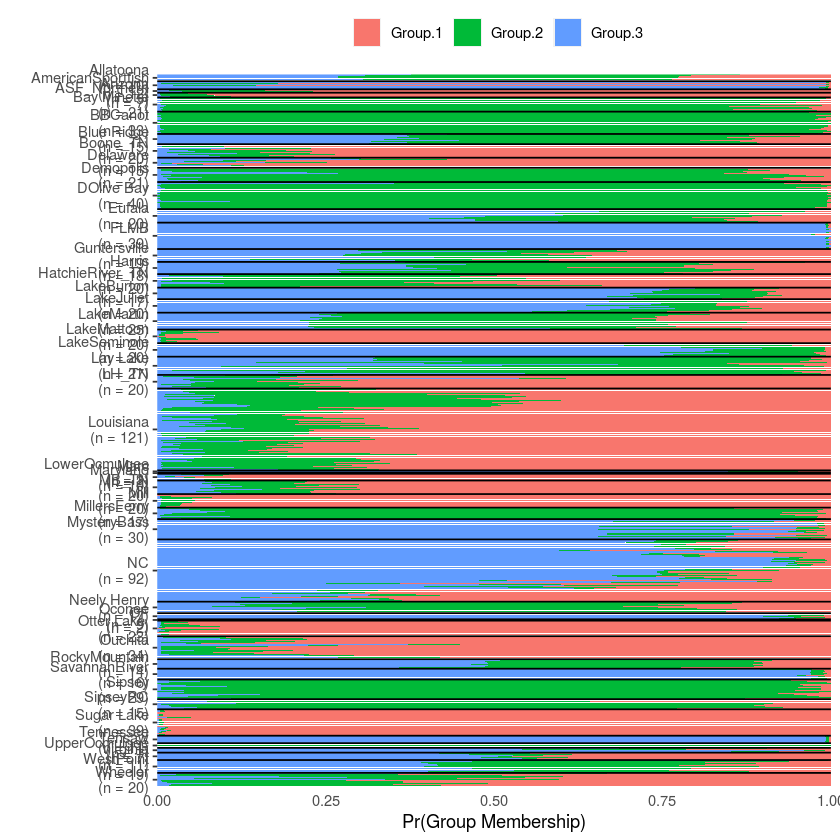

In [13]:
structurePlot(q.mat.cp,horiz=T, sort.probs=F, type="bar")

In [14]:
write.table(q.mat,file="0219_1207_newRefs.qmat.csv",row.names=F,quote=F,sep=",")

### Go through manually and remove reps and refs(for now)
need to make code to remove refs, assign individuals to site, get mean qvalues per site


In [ ]:
sites = substr(indNames(ad),1,2)
species = sites
map = setNames( as.vector(dict$SpeciesNum),as.vector(dict$Pop.ID))
species[] <- map[unlist(sites)]
pop(ad) <- species

In [ ]:
q.mat[which(grepl("LM20",q.mat$id)),]